In [1]:
from superfv import AdvectionSolver, initial_conditions
from functools import partial
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def square(x, y, z, bounds=(0, 1)):
    return (bounds[1] - bounds[0]) * np.where(
        np.logical_and(np.abs(x - 0.5) < 0.25, np.abs(y - 0.5) < 0.25), 1, 0
    ) + bounds[0]


solver = AdvectionSolver(
    ic=partial(initial_conditions.sinus, vx=1),
    ic_passives={"passive_square": partial(square, bounds=(0, 1))},
    bcx="dirichlet",
    x_dirichlet=np.array([0, 1, 0, 0]),
    nx=64,
    ny=1,
    nz=1,
    p=1,
)

solver.run(0.1)

100%|██████████| 0.1/0.1 [00:00]                 


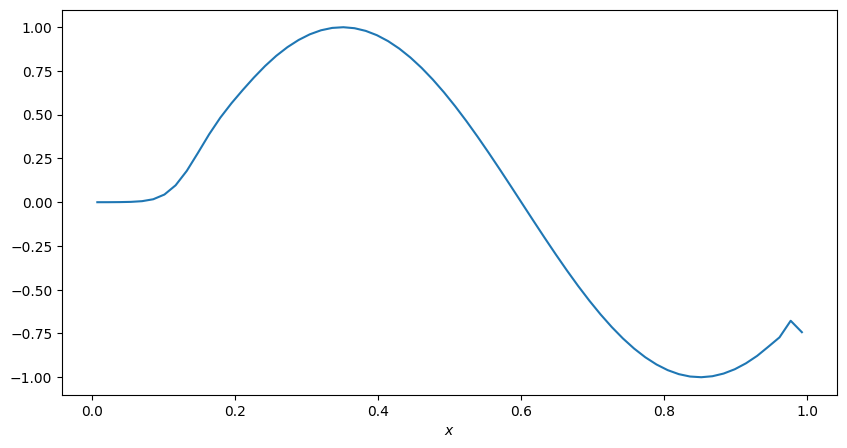

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
solver.plot_1d_slice(ax, "rho", x=None)